In [1]:
# Description: An stock analyse program
# Autor : SICHENG ZHAO
#coding:utf-8

import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats# Block 0 Data importing
import tushare as ts
import baostock as bs    
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
token=""
# Tushare 源
#pro = ts.pro_api(token)
# 1.上市股票列表
#stocklist = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

# 2.获取行情数据
#s1=pro.daily(ts_code='601318.SH', start_date='20200601', end_date='202001101')

# baostock 源
lg = bs.login(user_id="anonymous", password="123456")
fields ="date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,\
peTTM,pbMRQ,psTTM,pcfNcfTTM,isST"
rs = bs.query_history_k_data("sh.601318",fields,start_date='2019-01-01', end_date='2020-11-01', frequency="d", adjustflag="3")   
data_list = []
while rs.next():
    data_list.append(rs.get_row_data()) 
# 数据集
s1 = pd.DataFrame(data_list, columns=rs.fields)

login success!


,date,close,pctChg,volume,Log_T,Diff_Log_Return,Diff_Log_Return(in %)
0,2019-01-02,55.18,-1.639925,82554243,4.010601,NaN,NaN
1,2019-01-03,55.68,0.906125,69271124,4.019621,0.009020,0.902045
2,2019-01-04,56.59,1.634339,112985585,4.035832,0.016211,1.621128
3,2019-01-07,56.30,-0.512460,76593007,4.030695,-0.005138,-0.513776
4,2019-01-08,55.80,-0.888100,55992092,4.021774,-0.008921,-0.892067
5,2019-01-09,56.95,2.060935,81914613,4.042174,0.020400,2.039982
6,2019-01-10,57.50,0.965758,67328223,4.051785,0.009611,0.961126
7,2019-01-11,58.07,0.991304,45756973,4.061649,0.009864,0.986423
8,2019-01-14,57.12,-1.635958,47532651,4.045154,-0.016495,-1.649486
9,2019-01-15,58.59,2.573532,58626487,4.070564,0.025410,2.540972


,close,Log_T,Diff_Log_Return,Diff_Log_Return(in %)
count,443.000000,443.000000,442.000000,442.000000
mean,79.240339,4.366939,0.000778,0.077811
std,8.083106,0.107339,0.017279,1.727935
min,55.180000,4.010601,-0.071743,-7.174291
25%,73.915000,4.302916,-0.008866,-0.886647
50%,79.930000,4.381151,0.000000,0.000000
75%,86.005000,4.454405,0.009639,0.963926
max,92.340000,4.525477,0.085468,8.546836


C:\Users\Microsft\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


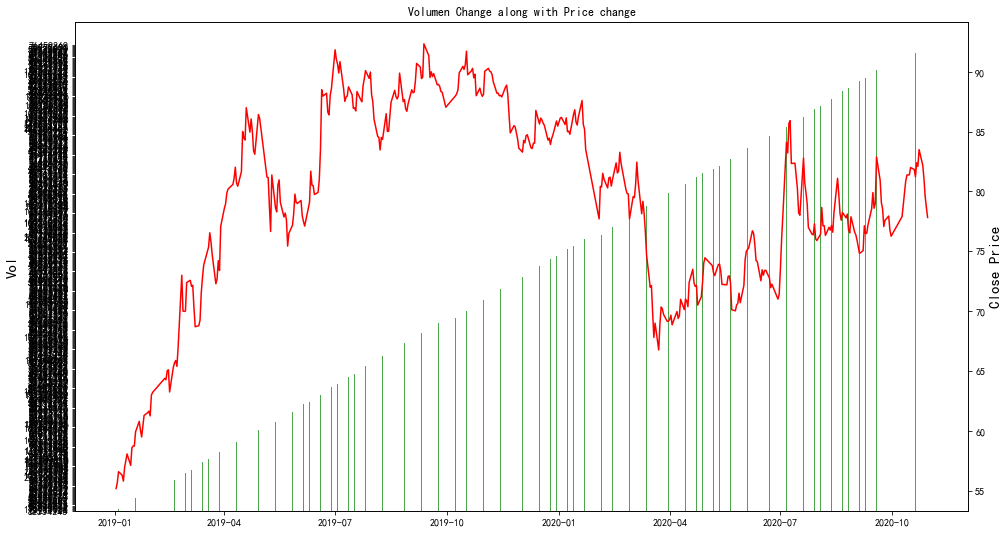

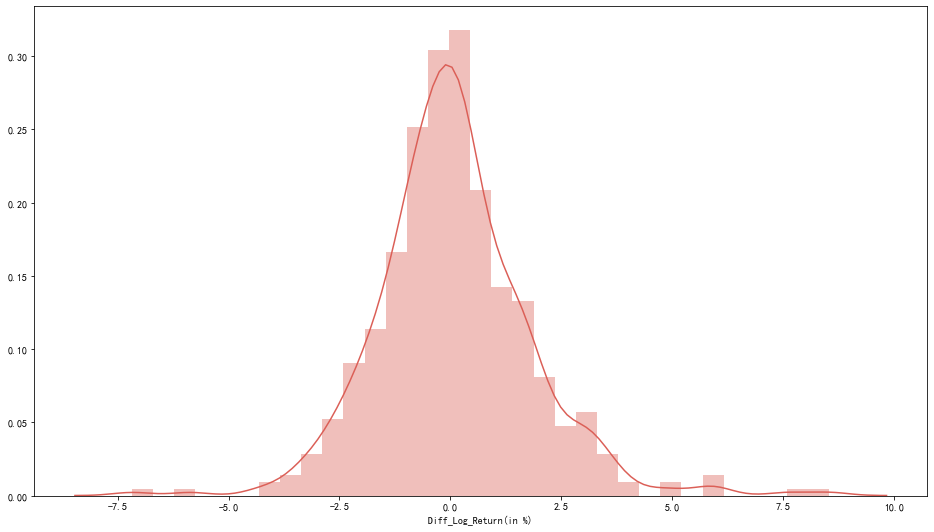

In [3]:
def ProcessData(df):
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values("date",inplace=True)
    data_df = df.loc[:,["date","close","pctChg","volume"]]
    data_df.set_index("date")
    data_df["close"]=pd.to_numeric(data_df["close"])
    data_df["Log_T"]=data_df["close"].apply(np.log)
    data_df["Diff_Log_Return"]=data_df["Log_T"].diff(1)
    data_df["Diff_Log_Return(in %)"]=data_df["Diff_Log_Return"].multiply(100)
    display(data_df)
    return(data_df)

s1_processed= ProcessData(s1)
# 0. Statistics of the data
display(s1_processed.describe())
# 1. Vol change
x = s1_processed["date"]
y1 = s1_processed["volume"]
y2 = s1_processed["close"]
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,alpha=.7,color='g',width = 0.1)
ax1.set_ylabel('Vol',fontsize='15')

ax2 = ax1.twinx()   
ax2.plot(x, y2, 'r',ms=10)
ax2.set_ylabel('Close Price',fontsize='15')
plt.title("Volumen Change along with Price change")
plt.show()
# 2. Distribution Plot
sns.set_palette("hls")
mpl.rc("figure", figsize=(16,9))
sns.distplot(s1_processed["Diff_Log_Return(in %)"])

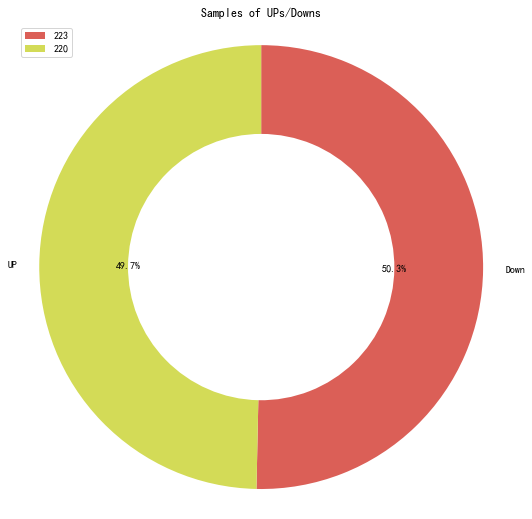

In [4]:
# Research 1 (规律：增量上涨 次日涨/增量下跌 次日跌/缩量上涨 次日跌/ 缩量下跌 次日涨 的统计学证据)
s1["UPs/Downs"]=""
condi=pd.to_numeric(s1.pctChg)
s1.loc[condi>0,"UPs/Downs"]="UP"
s1.loc[condi<=0,"UPs/Downs"]="Down"
sorted_counts = s1["UPs/Downs"].value_counts()
s1["volume_diff"] = pd.to_numeric(s1.volume).diff(1)
condi2=s1["volume_diff"]
s1.loc[condi2>0,"VolChg"]="Increase"
s1.loc[condi2<=0,"VolChg"]="Reduce"
s1=s1.loc[1:]
list_var = ["date","close","volume","pctChg","UPs/Downs","VolChg"]
s1 = s1[list_var]
s1["UPs/Downs T+1"]=s1["UPs/Downs"].shift(-1)
s1=s1.loc[:len(s1)-1,]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},autopct="%1.1f%%");
plt.axis('square')
plt.legend(sorted_counts, loc=2)
plt.title("Samples of UPs/Downs")
sorted_counts2 = s1["VolChg"].value_counts()

In [8]:

def function(a, b, c):
    if a=="UP" and b=="Reduce" and c=="Down":
        return "缩量上涨 次日跌"
    elif a=="UP" and b=="Increase" and c=="UP": 
        return "增量上涨 次日涨"
    elif a=="Down" and b=="Reduce" and c=="UP": 
        return "缩量下跌 次日涨"
    elif a=="Down" and b=="Increase" and c=="Down": 
        return "增量下跌 次日跌"
    else:
        return "不符合"
def function2(a):
    if a=="不符合":
        return 0
    else:
        return 1
s1['test'] = s1.apply(lambda x: function(x["UPs/Downs"], x["VolChg"],x["UPs/Downs T+1"]), axis = 1)
s1["Coincident"]=s1.apply(lambda x: function2(x.test), axis = 1)

In [9]:
s1

,date,close,volume,pctChg,UPs/Downs,VolChg,UPs/Downs T+1,test,Coincident
1,2019-01-03,55.6800,69271124,0.906125,UP,Reduce,UP,不符合,0
2,2019-01-04,56.5900,112985585,1.634339,UP,Increase,Down,不符合,0
3,2019-01-07,56.3000,76593007,-0.512460,Down,Reduce,Down,不符合,0
4,2019-01-08,55.8000,55992092,-0.888100,Down,Reduce,UP,缩量下跌 次日涨,1
5,2019-01-09,56.9500,81914613,2.060935,UP,Increase,UP,增量上涨 次日涨,1
6,2019-01-10,57.5000,67328223,0.965758,UP,Reduce,UP,不符合,0
7,2019-01-11,58.0700,45756973,0.991304,UP,Reduce,Down,缩量上涨 次日跌,1
8,2019-01-14,57.1200,47532651,-1.635958,Down,Increase,UP,不符合,0
9,2019-01-15,58.5900,58626487,2.573532,UP,Increase,UP,增量上涨 次日涨,1
10,2019-01-16,58.7400,40411183,0.256019,UP,Reduce,Down,缩量上涨 次日跌,1


In [6]:
result1 = s1.test.value_counts()

Text(0.5, 1.0, '中国平安 回测结果 2019/01/01-2020/11/01')

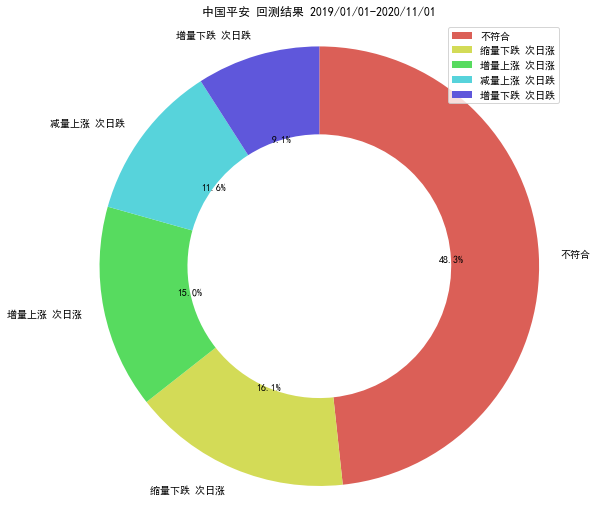

In [12]:
plt.pie(result1, labels = result1.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},autopct="%1.1f%%")
plt.axis('square')
plt.legend(result1.index, loc=1)
plt.title("中国平安 回测结果 2019/01/01-2020/11/01")


'C:\\Users\\Microsft\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'